In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch

In [4]:
t102 = pd.read_csv('Таёжное 102.csv', sep = ';')
t103 = pd.read_csv('Таёжное 103.csv', sep = ';')

In [5]:
t102 = t102.fillna('')
t103 = t103.fillna('')

In [6]:
t102 = t102[::-1]
index_2 = range(1,14,1)
t102.index = index_2
t103 = t103[::-1]
index_3 = range(1,17,1)
t103.index = index_3

In [ ]:
rocks_t102 = t102['Rock'] + t102['Color'] + ' ' + t102['ТЕКСТУРА'] + ' ' + t102['Включения органогенные'] + ' ' + t102['Включения минеральные'] + ' ' + t102['НЕФТЕНАСЫЩЕНИЕ'] + ' ' + t102['ПОДОШВА СЛОЯ']
rocks_t103 = t103['Rock'] + t103['Color'] + ' ' + t103['ТЕКСТУРА'] + ' ' + t103['Включения органогенные'] + ' ' + t103['Включения минеральные'] + ' ' + t103['НЕФТЕНАСЫЩЕНИЕ'] + ' ' + t103['ПОДОШВА СЛОЯ']
rocks_t102

pandas.core.series.Series

In [22]:
m = len(rocks_t103)
n = len(rocks_t102)

levensht_matrix = np.zeros((m+1, n+1), dtype=np.int_)

levensht_matrix[0, :] = np.arange(n+1)
levensht_matrix[:, 0] = np.arange(m+1)
levensht_matrix

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [15,  0,  0,  0,  

In [ ]:

for i in range(1, m+1):
    for j in range(1, n+1):

        up_value = levensht_matrix[i-1, j] + 1
        left_value = levensht_matrix[i, j-1] + 1

        if rocks_t102.iloc[j-1] == rocks_t103.iloc[i-1]:
            diag_value = levensht_matrix[i-1, j-1]
        else:
            diag_value = levensht_matrix[i-1, j-1] + 1

        value = min(up_value, left_value, diag_value)
        levensht_matrix[i, j] = value
        
levensht_matrix

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  2,  1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 4,  3,  2,  2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  4,  3,  2,  3,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 6,  5,  4,  3,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 7,  6,  5,  4,  3,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 8,  7,  6,  5,  4,  3,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 9,  8,  7,  6,  5,  4,  3,  2,  3,  4,  5,  6,  7,  8],
       [10,  9,  8,  7,  6,  5,  4,  3,  2,  3,  4,  5,  6,  7],
       [11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  3,  4,  5,  6],
       [12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  3,  4,  5,  6],
       [13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  4,  5,  6],
       [14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  4,  5],
       [15, 14, 13, 12, 1

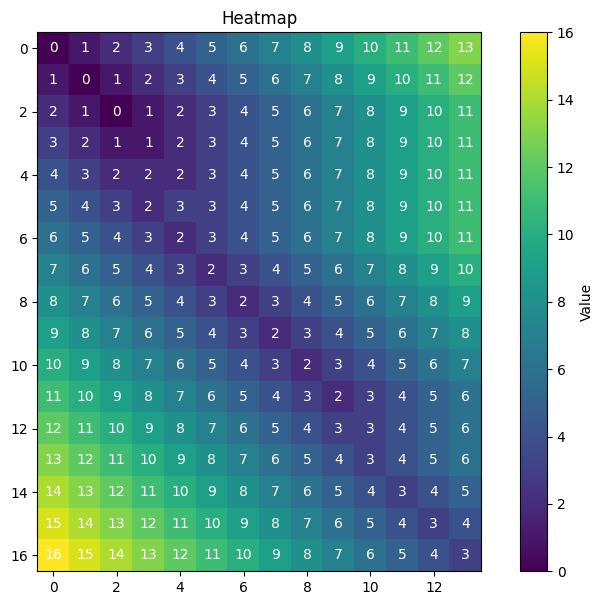

In [26]:
plt.figure(figsize=(10, 7))
plt.imshow(levensht_matrix, cmap='viridis') 
plt.colorbar(label='Value')
for i in range(levensht_matrix.shape[0]):
    for j in range(levensht_matrix.shape[1]):
        plt.text(j, i, f"{int(levensht_matrix[i, j])}", ha='center', va='center', color='white')
plt.title('Heatmap')
plt.show()

In [28]:

def trace_path(matrix, series1, series2):
    path = []
    i, j = matrix.shape[0]-1, matrix.shape[1]-1
    correlations = []

    while i > 0 or j > 0:
        path.append((i, j))
        if i == 0:
            correlations.append(f"Пласт {j-1} из серии 2 выклинивается")
            j -= 1
        elif j == 0:
            correlations.append(f"Пласт {i-1} из серии 3 выклинивается")
            i -= 1
        else:
            min_val = min(matrix[i-1, j-1], matrix[i-1, j], matrix[i, j-1])
            if matrix[i-1, j-1] == min_val:
                if series1.iloc[j-1] == series2.iloc[i-1]:
                    correlations.append(f"Пласты {j-1} и {i-1} совпадают")
                else:
                    correlations.append(f"Пласты {j-1} и {i-1} частично совпадают")
                i -= 1
                j -= 1
            elif matrix[i-1, j] == min_val:
                correlations.append(f"Пласт {i-1} из серии 3 выклинивается")
                i -= 1
            else:
                correlations.append(f"Пласт {j-1} из серии 2 выклинивается")
                j -= 1

    path.append((0, 0))
    return path[::-1], correlations[::-1]

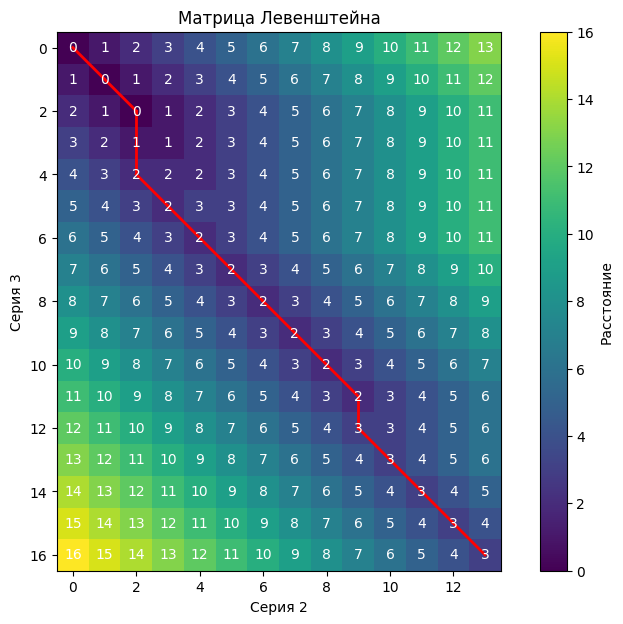

Результаты корреляции:
Пласты 0 и 0 совпадают
Пласты 1 и 1 совпадают
Пласт 2 из серии 3 выклинивается
Пласт 3 из серии 3 выклинивается
Пласты 2 и 4 совпадают
Пласты 3 и 5 совпадают
Пласты 4 и 6 совпадают
Пласты 5 и 7 совпадают
Пласты 6 и 8 совпадают
Пласты 7 и 9 совпадают
Пласты 8 и 10 совпадают
Пласт 11 из серии 3 выклинивается
Пласты 9 и 12 совпадают
Пласты 10 и 13 совпадают
Пласты 11 и 14 совпадают
Пласты 12 и 15 совпадают


In [29]:

path, correlations = trace_path(levensht_matrix, rocks_t102, rocks_t103)

plt.figure(figsize=(10, 7))
plt.imshow(levensht_matrix, cmap='viridis')
plt.colorbar(label='Расстояние')
plt.title('Матрица Левенштейна')

for i in range(levensht_matrix.shape[0]):
    for j in range(levensht_matrix.shape[1]):
        plt.text(j, i, f"{int(levensht_matrix[i, j])}", ha='center', va='center', color='w')

for (i1, j1), (i2, j2) in zip(path[:-1], path[1:]):
    plt.plot([j1, j2], [i1, i2], 'r-', linewidth=2)

plt.xlabel("Серия 2")
plt.ylabel("Серия 3")
plt.show()

print("Результаты корреляции:")
for line in correlations:
    print(line)

In [ ]:
def prepare_well_data(df):

    codes = {'П': 3, 'Г': 2, 'У': 1}  # Кодировка пород
    depths = df['Depth'].values
    rocks = df['Rock'].map(lambda x: codes.get(x[0], 4)).values
    heights = df['H'].values

    new_depth = []
    rock_plot = []

    for i in range(len(depths)):
        d = depths[i]
        h = heights[i]
        code = rocks[i]

        if i == 0:
            new_depth.extend([d, d])
        elif i == len(depths)-1:
            new_depth.extend([d]*4 + [d+h]*2)
        else:
            new_depth.extend([d]*4)

        rock_plot.extend([0, code, code, 0])

    return new_depth, rock_plot

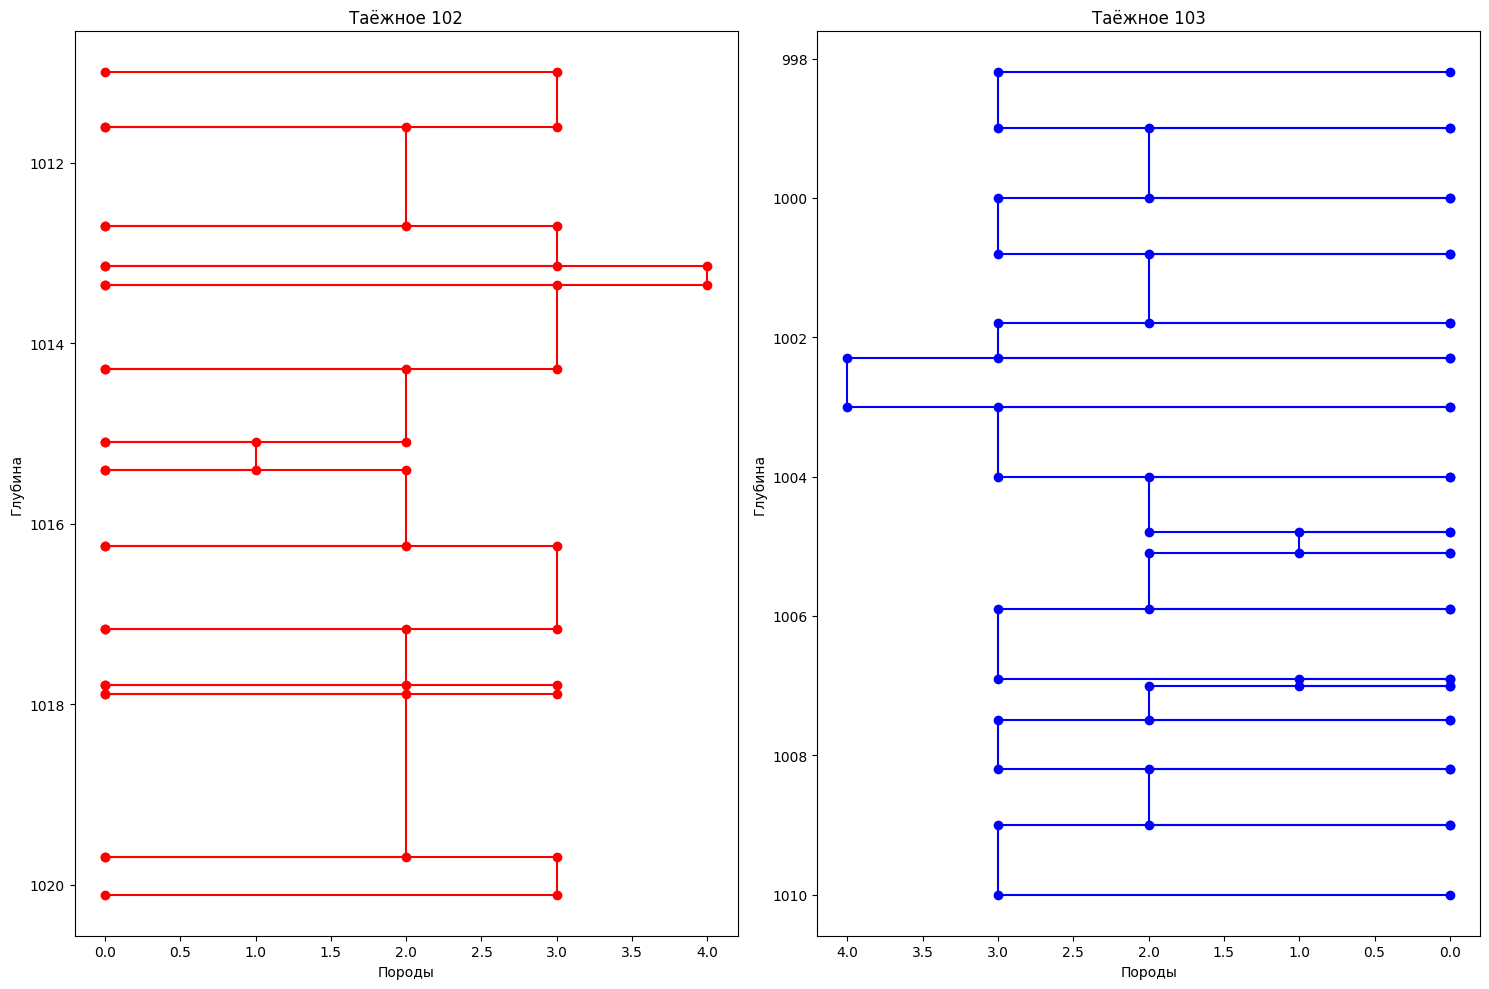

In [ ]:
new_depth_2, rock_2_plot = prepare_well_data(t102)
new_depth_3, rock_3_plot = prepare_well_data(t103)

fig, ax = plt.subplots(ncols=2, figsize=(15, 10))

ax[0].plot(rock_2_plot, new_depth_2, c='r', marker='o')
ax[0].invert_yaxis()  
ax[0].set_title('Таёжное 102')
ax[0].set_xlabel('Породы')
ax[0].set_ylabel('Глубина')

ax[1].plot(rock_3_plot, new_depth_3, c='b', marker='o')
ax[1].invert_yaxis()  
ax[1].invert_xaxis()
ax[1].set_title('Таёжное 103')
ax[1].set_xlabel('Породы')
ax[1].set_ylabel('Глубина')

plt.tight_layout()
plt.show()

In [55]:
def prepare_well(df):
    df = df.sort_values('Depth')
    intervals = []
    for i, row in df.iterrows():
        top = row['Depth']
        base = row['Depth'] + row['H']
        intervals.append({'top': top, 'base': base, 'rock': row['Rock']})
    return intervals

In [51]:
t102['Rock'].unique()


array(['Песчаники крупнозернистые', 'Глины', 'Известняки песчанистые',
       'Угли'], dtype=object)

In [54]:
t103['Rock'].unique()


array(['Песчаники крупнозернистые', 'Глины', 'Известняки песчанистые',
       'Угли'], dtype=object)

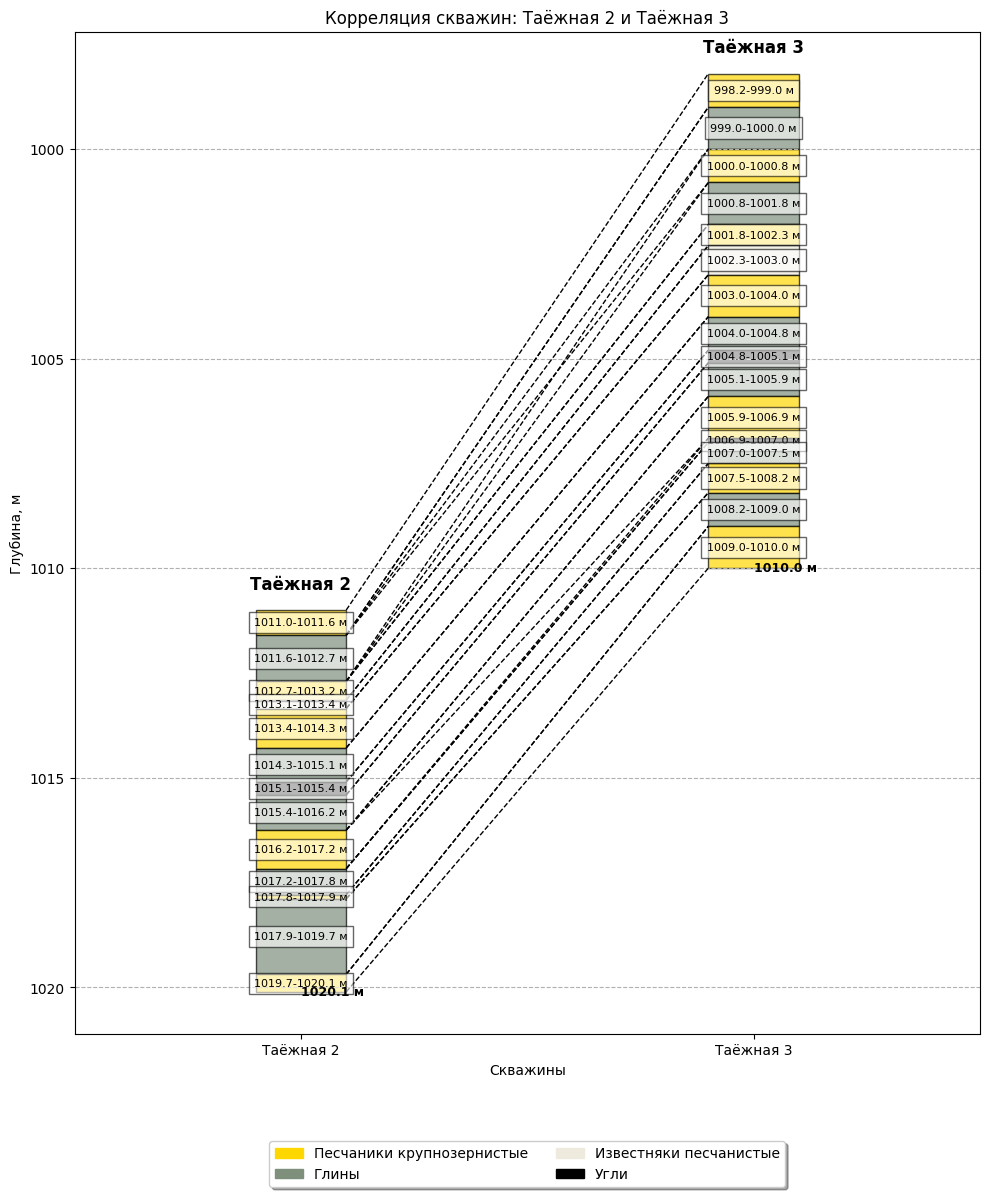

In [ ]:

rock_colors = {
    'Песчаники крупнозернистые': '#FFD700',
    'Глины': '#7E8F7C',        
    'Известняки песчанистые': '#EEEBDE',    
    'Угли': '#000000',      
}

intervals_2 = prepare_well(t102)
intervals_3 = prepare_well(t103)

fig, ax = plt.subplots(figsize=(10, 12))

def plot_well(intervals, xpos, ax, label):
    width = 0.4
    for interval in intervals:
        color = rock_colors.get(interval['rock']) 
        rect = Rectangle((xpos - width/2, interval['top']), width,
                         interval['base'] - interval['top'],
                         facecolor=color, edgecolor='black', alpha=0.7)
        ax.add_patch(rect)
        
        
        ax.text(xpos, (interval['top'] + interval['base'])/2, 
                f"{interval['top']:.1f}-{interval['base']:.1f} м",
                ha='center', va='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.6))

    
    ax.text(xpos, intervals[-1]['base'], f"{intervals[-1]['base']:.1f} м", 
            va='center', ha='left', fontsize=9, weight='bold')

    
    ax.text(xpos, intervals[0]['top']-0.5, label, ha='center', fontsize=12, weight='bold')

plot_well(intervals_2, xpos=1, ax=ax, label="Таёжная 2")
plot_well(intervals_3, xpos=3, ax=ax, label="Таёжная 3")

path = [[0,0], [1,1], [1, 2], [1, 3], [2, 4], [3,5], [4,6], [5, 7], [6,8], [7,9], [8,10], [8,11], [9,12], [10,13], [11,14], [12,15]]


for idx2, idx3 in path:
    int2 = intervals_2[idx2]
    int3 = intervals_3[idx3]

    ax.plot([1 + 0.2, 3 - 0.2], [int2['top'], int3['top']], 'k--', lw=1)

    ax.plot([1 + 0.2, 3 - 0.2], [int2['base'], int3['base']], 'k--', lw=1)

ax.set_xlim(0, 4)
ax.set_ylim(max(intervals_2[-1]['base'], intervals_3[-1]['base']) + 1,
            min(intervals_2[0]['top'], intervals_3[0]['top']) - 1)

ax.set_xlabel('Скважины')
ax.set_ylabel('Глубина, м')
ax.set_title('Корреляция скважин: Таёжная 2 и Таёжная 3')
ax.grid(axis='y', linestyle='--')

patches = [Patch(color=c, label=r) for r, c in rock_colors.items()]

ax.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.1),
           fancybox=True, shadow=True, ncol=2)

plt.xticks([1, 3], ['Таёжная 2', 'Таёжная 3'])
plt.tight_layout()
plt.show()